In [161]:
import pandas as pd

In [162]:
df = pd.read_csv("wildfires_training.csv")

In [163]:
df

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,no,2015,28,59,0.0,8.06,3.47,1,6,19
1,no,2010,30,61,1.3,8.17,4.03,2,6,13
2,no,2009,26,83,13.1,8.08,3.59,3,6,22
3,no,2017,25,87,2.5,7.18,2.42,4,6,15
4,no,2014,28,77,0.0,14.98,4.63,5,6,18
...,...,...,...,...,...,...,...,...,...,...
149,yes,2017,31,67,0.0,45.15,17.89,26,9,15
150,no,2017,29,89,4.4,8.74,6.52,27,9,15
151,no,2009,27,88,0.5,8.87,3.71,28,9,30
152,no,2016,25,56,0.1,15.54,6.10,29,9,20


In [164]:
from sklearn.preprocessing import OrdinalEncoder

In [165]:
is_fire = ['no', 'yes']

In [166]:
enc = OrdinalEncoder(categories=[is_fire])

In [167]:
df['fire'] = enc.fit_transform(df[['fire']])

In [168]:
df

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,0.0,2015,28,59,0.0,8.06,3.47,1,6,19
1,0.0,2010,30,61,1.3,8.17,4.03,2,6,13
2,0.0,2009,26,83,13.1,8.08,3.59,3,6,22
3,0.0,2017,25,87,2.5,7.18,2.42,4,6,15
4,0.0,2014,28,77,0.0,14.98,4.63,5,6,18
...,...,...,...,...,...,...,...,...,...,...
149,1.0,2017,31,67,0.0,45.15,17.89,26,9,15
150,0.0,2017,29,89,4.4,8.74,6.52,27,9,15
151,0.0,2009,27,88,0.5,8.87,3.71,28,9,30
152,0.0,2016,25,56,0.1,15.54,6.10,29,9,20


In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X = df.drop('fire', axis=1)

In [171]:
y = df['fire']

In [172]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [173]:
X_train, X_validate, y_train, y_validate = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

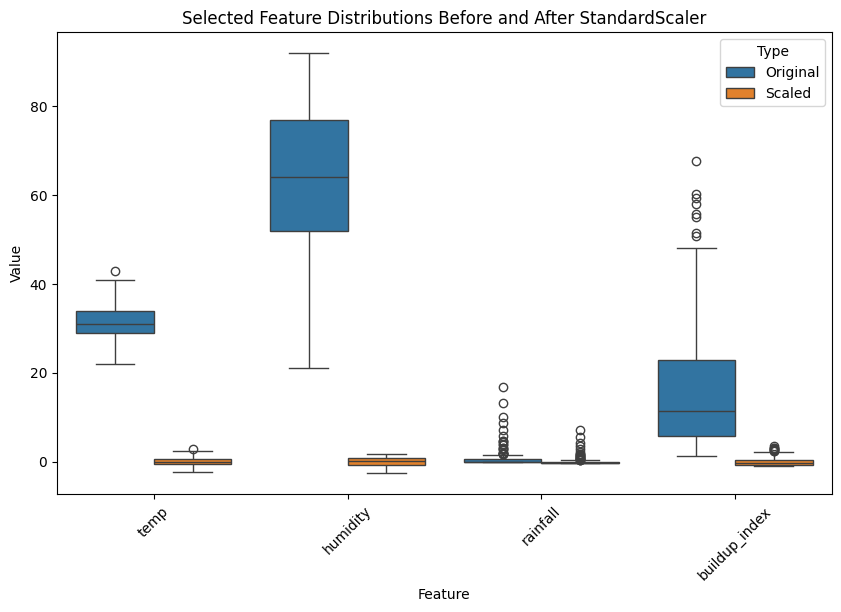

In [184]:
features_to_plot = ['temp', 'humidity', 'rainfall', 'buildup_index']
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
# Subset original and scaled data
X_subset = X[features_to_plot]
X_scaled_subset = pd.DataFrame(X_scaled_df[features_to_plot], columns=features_to_plot)

# Melt for combined plotting
X_orig_long = X_subset.melt(var_name='Feature', value_name='Value')
X_orig_long['Type'] = 'Original'

X_scaled_long = X_scaled_subset.melt(var_name='Feature', value_name='Value')
X_scaled_long['Type'] = 'Scaled'

combined = pd.concat([X_orig_long, X_scaled_long])

# Plot boxplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', hue='Type', data=combined)
plt.title('Selected Feature Distributions Before and After StandardScaler')
plt.xticks(rotation=45)
plt.show()

In [175]:
from sklearn import svm

In [176]:
model = svm.SVC(
    C = 1.0,
    gamma = 'auto',
    kernel = 'rbf',
)

In [177]:
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [178]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [179]:
y_pred = model.predict(X_validate)

In [180]:
print("Validation Accuracy:", accuracy_score(y_validate, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_validate, y_pred))
print("\nClassification Report:\n", classification_report(y_validate, y_pred))

Validation Accuracy: 0.8709677419354839

Confusion Matrix:
 [[16  1]
 [ 3 11]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89        17
         1.0       0.92      0.79      0.85        14

    accuracy                           0.87        31
   macro avg       0.88      0.86      0.87        31
weighted avg       0.88      0.87      0.87        31

